In [1]:
# kết nối với file
file = open('simple_data.csv','r')

# readlines giúp việc đọc file theo từng dòng , mỗi dòng là 1 chuỗi
lines = file.readlines()

areas = []
prices= []
for i in range(10): 
    string = lines[i].split(',')
    areas.append(float(string[0]))
    prices.append(float(string[1]))
    
# Đóng kết nối với file
file.close()

print(areas)
print(prices)

[6.71, 1.2, 1.86, 2.09, 3.05, 4.69, 3.57, 5.55, 2.39, 3.94]
[9.12, 2.43, 2.91, 3.41, 4.71, 5.94, 5.4, 7.04, 3.38, 5.29]


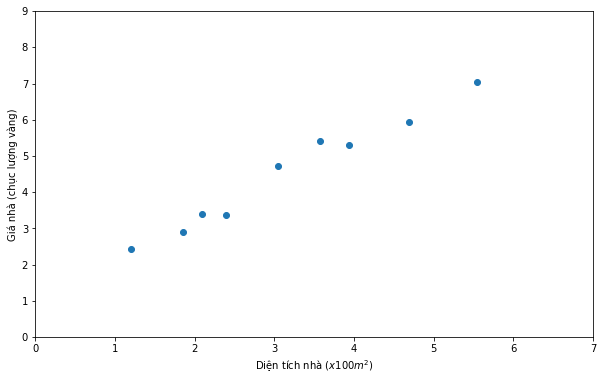

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim((0, 9))
ax.set_xlim((0, 7))

plt.scatter(areas, prices)
plt.ylabel('Giá nhà (chục lượng vàng)')
plt.xlabel('Diện tích nhà ($x 100 m^2$)')
    
plt.show()

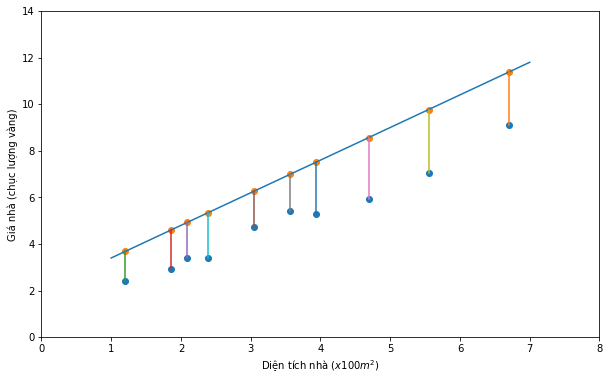

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim((0, 14))
ax.set_xlim((0, 8))

plt.scatter(areas, prices)
plt.ylabel('Giá nhà (chục lượng vàng)')
plt.xlabel('Diện tích nhà ($x 100 m^2$)')

x_data = list(range(1, 8))
y_data = [1.4*x + 2 for x in x_data]
plt.plot(x_data, y_data)

for x,y in zip(areas,prices):
    plt.plot([x, x], [y, 1.4*x + 2])
plt.scatter(areas, [1.4*x + 2 for x in areas])
    
plt.show()

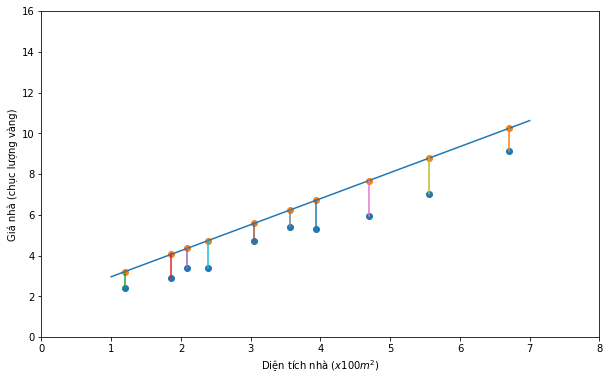

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.colors import LogNorm
import random

def update_plot(i):        
    plt.cla()
    
    ax.set_ylim((0, 16))
    ax.set_xlim((0, 8))

    plt.scatter(areas, prices)
    plt.ylabel('Giá nhà (chục lượng vàng)')
    plt.xlabel('Diện tích nhà ($x 100 m^2$)')

    a = random.random() + 0.5
    b = random.random()*2 + 1

    x_data = list(range(1, 8))
    y_data = [a*x + b for x in x_data]
    plt.plot(x_data, y_data)

    for x,y in zip(areas,prices):
        plt.plot([x, x], [y, a*x + b])
    plt.scatter(areas, [a*x + b for x in areas])
    
    
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_ylim((0, 16))
ax.set_xlim((0, 8))

plt.scatter(areas, prices)
plt.ylabel('Giá nhà (chục lượng vàng)')
plt.xlabel('Diện tích nhà ($x 100 m^2$)')

a = (random.random() - 0.6)*4
b = (random.random()-0.4)*9

x_data = list(range(1, 8))
y_data = [a*x + b for x in x_data]
plt.plot(x_data, y_data)

for x,y in zip(areas,prices):
    plt.plot([x, x], [y, a*x + b])
plt.scatter(areas, [a*x + b for x in areas])
    
#plt.show()
ani = animation.FuncAnimation(fig, update_plot, interval=2000, frames=range(10), fargs=())    
HTML(ani.to_html5_video())
#ani.save('chap4_house_ani1.gif', writer='imagemagick', fps=1)

In [6]:
# aivietnam.ai - estimation of house prices
import random

n = 2                  # size of individual (chromosome)
m = 100                # size of population
n_generations = 2000   # number of generations
losses = []            # để vẽ biểu đồ quá trình tối ưu

# Hàm load data
def load_data():
    # kết nối với file
    file = open('data.csv','r')

    # readlines giúp việc đọc file theo từng dòng , mỗi dòng là 1 chuỗi
    lines = file.readlines()
    
    areas  = []
    prices = []
    for i in range(10): 
        string = lines[i].split(',')
        areas.append(float(string[0]))
        prices.append(float(string[1]))

    # Đóng kết nối với file
    file.close()
    
    return areas, prices

# load data
areas, prices = load_data()

def generate_random_value(bound = 200):
    return (random.random()-0.5)*bound

def compute_loss(individual):
    result = 65534
    
    a = individual[0]
    b = individual[1]    
    estimated_prices = [a*x + b for x in areas]
    
    # all prices should be positive numbers
    num_negetive_prices = sum(p < 0 for p in estimated_prices)
    if num_negetive_prices == 0:        
        losses = [abs(y_est-y_gt) for y_est, y_gt in zip(estimated_prices, prices)]
        result = sum(losses)
    
    return result

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1 / (loss + 1)
    return fitness

def create_individual():
    return [generate_random_value() for _ in range(n)]

def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]            
    
    return individual1_new, individual2_new

def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

def selection(sorted_old_population):    
    index1 = random.randint(0, m-1)    
    while True:
        index2 = random.randint(0, m-1)    
        if (index2 != index1):
            break
            
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s 

def create_new_population(old_population, elitism=2, gen=1):
    sorted_population = sorted(old_population, key=compute_fitness)
        
    if gen%1 == 0:
        losses.append(compute_loss(sorted_population[m-1]))
        #print("Best loss:", compute_loss(sorted_population[m-1]), sorted_population[m-1])      
    
    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)            
    
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy())
    
    return new_population

population = [create_individual() for _ in range(m)]
for i in range(n_generations):
    population = create_new_population(population, 2, i)

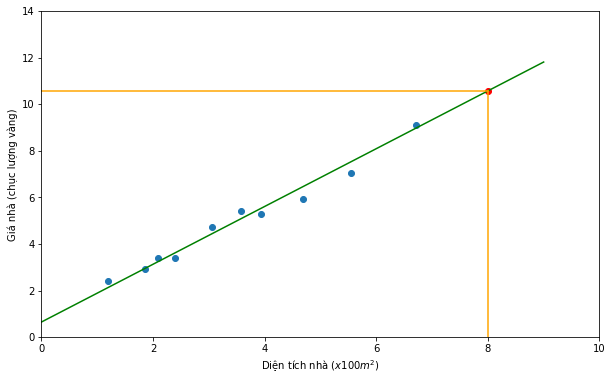

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim((0, 14))
ax.set_xlim((0, 10))

plt.scatter(areas, prices)
plt.ylabel('Giá nhà (chục lượng vàng)')
plt.xlabel('Diện tích nhà ($x 100 m^2$)')

x_data = list(range(0, 10))
y_data = [1.24*x + 0.651 for x in x_data]
plt.plot(x_data, y_data,c='green')

plt.scatter([8], [1.24*8 + 0.651],c='red')
plt.plot([8, 8], [0, 1.24*8 + 0.651],c='orange')
plt.plot([0, 8], [1.24*8 + 0.651, 1.24*8 + 0.651],c='orange')
    
plt.show()

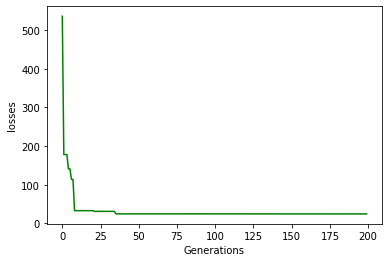

In [8]:
import matplotlib.pyplot as plt

plt.plot(losses[:200], c='green')
plt.xlabel('Generations')
plt.ylabel('losses')
plt.show()